In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import quantstats as qs
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
tickers = yf.Ticker('voo')
end_date = datetime.now().strftime('%Y-%m-%d')
df = tickers.history(start='2007-01-01',end=end_date)

df.tail(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-02-02 00:00:00-05:00,450.010010,455.880005,449.690002,454.279999,6251600,0.0,0.0,0.0
2024-02-05 00:00:00-05:00,453.730011,454.149994,450.540009,452.619995,7101900,0.0,0.0,0.0
2024-02-06 00:00:00-05:00,453.579987,454.290009,452.209991,454.029999,4383600,0.0,0.0,0.0
2024-02-07 00:00:00-05:00,456.149994,458.179993,455.269989,457.760010,6763400,0.0,0.0,0.0
2024-02-08 00:00:00-05:00,457.809998,458.116699,457.040009,457.959595,2829553,0.0,0.0,0.0


In [3]:
df['Daily Return'] = df['Close'].pct_change().round(5)
df.tail(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Daily Return
Date,,,,,,,,,
2024-02-02 00:00:00-05:00,450.010010,455.880005,449.690002,454.279999,6251600,0.0,0.0,0.0,0.01027
2024-02-05 00:00:00-05:00,453.730011,454.149994,450.540009,452.619995,7101900,0.0,0.0,0.0,-0.00365
2024-02-06 00:00:00-05:00,453.579987,454.290009,452.209991,454.029999,4383600,0.0,0.0,0.0,0.00312
2024-02-07 00:00:00-05:00,456.149994,458.179993,455.269989,457.760010,6763400,0.0,0.0,0.0,0.00822
2024-02-08 00:00:00-05:00,457.809998,458.116699,457.040009,457.959595,2829553,0.0,0.0,0.0,0.00044


In [4]:
# extend pandas functionality with metrics, etc.
qs.extend_pandas()

iasset = df['Daily Return'].dropna()

In [5]:
#To view a complete list of available methods.
[f for f in dir(qs.stats) if f[0] != '_']

['adjusted_sortino',
 'autocorr_penalty',
 'avg_loss',
 'avg_return',
 'avg_win',
 'best',
 'cagr',
 'calmar',
 'common_sense_ratio',
 'comp',
 'compare',
 'compsum',
 'conditional_value_at_risk',
 'consecutive_losses',
 'consecutive_wins',
 'cpc_index',
 'cvar',
 'distribution',
 'drawdown_details',
 'expected_return',
 'expected_shortfall',
 'exposure',
 'gain_to_pain_ratio',
 'geometric_mean',
 'ghpr',
 'greeks',
 'implied_volatility',
 'information_ratio',
 'kelly_criterion',
 'kurtosis',
 'max_drawdown',
 'monthly_returns',
 'omega',
 'outlier_loss_ratio',
 'outlier_win_ratio',
 'outliers',
 'payoff_ratio',
 'pct_rank',
 'probabilistic_adjusted_sortino_ratio',
 'probabilistic_ratio',
 'probabilistic_sharpe_ratio',
 'probabilistic_sortino_ratio',
 'profit_factor',
 'profit_ratio',
 'r2',
 'r_squared',
 'rar',
 'recovery_factor',
 'remove_outliers',
 'risk_of_ruin',
 'risk_return_ratio',
 'rolling_greeks',
 'rolling_sharpe',
 'rolling_sortino',
 'rolling_volatility',
 'ror',
 'seren

In [6]:
iasset.sharpe()

0.8475614094778988

In [7]:
iasset.max_drawdown()

-0.3399200171898058

In [8]:
iasset.expected_return()

0.0005215281011696771

In [9]:
iasset.value_at_risk()

-0.017316510955997236

In [10]:
iasset.volatility()

0.17272862411695442

In [11]:
iasset.expected_shortfall()

-0.027117006369426752

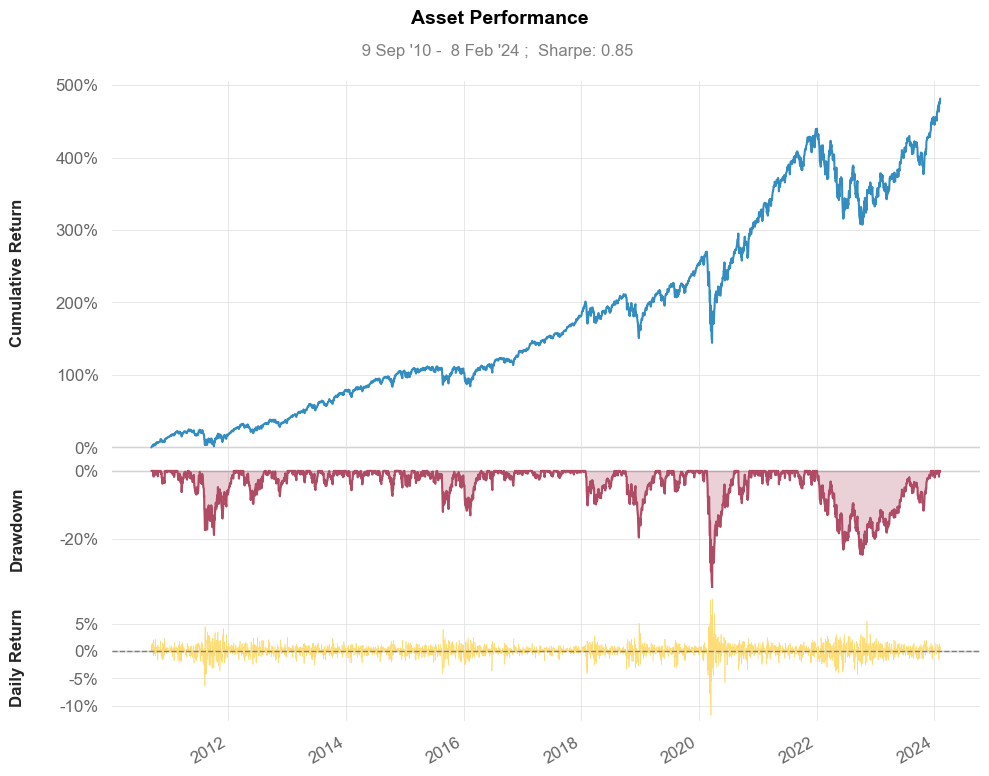

In [12]:
iasset.plot_snapshot(title='Asset Performance', show=True)

                           Strategy
-------------------------  ----------
Start Period               2010-09-10
End Period                 2024-02-08
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          481.37%
CAGR﹪                     9.48%

Sharpe                     0.85
Prob. Sharpe Ratio         99.88%
Smart Sharpe               0.75
Sortino                    1.19
Smart Sortino              1.06
Sortino/√2                 0.84
Smart Sortino/√2           0.75
Omega                      1.18

Max Drawdown               -33.99%
Longest DD Days            708
Volatility (ann.)          17.27%
Calmar                     0.28
Skew                       -0.5
Kurtosis                   13.23

Expected Daily %           0.05%
Expected Monthly %         1.09%
Expected Yearly %          12.45%
Kelly Criterion            8.2%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.73%
Expected Shortfall (cVaR)  -1.73%

Max Consecutive Wins     

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-02-20,2020-03-23,2020-08-07,169,-33.992002,-29.371080
2,2022-01-04,2022-10-12,2023-12-12,708,-24.526226,-23.215723
3,2018-09-21,2018-12-24,2019-04-11,203,-19.477739,-15.947481
4,2011-05-02,2011-10-03,2012-02-02,277,-18.753603,-17.274751
5,2015-07-21,2016-02-11,2016-04-15,270,-13.004368,-11.873708


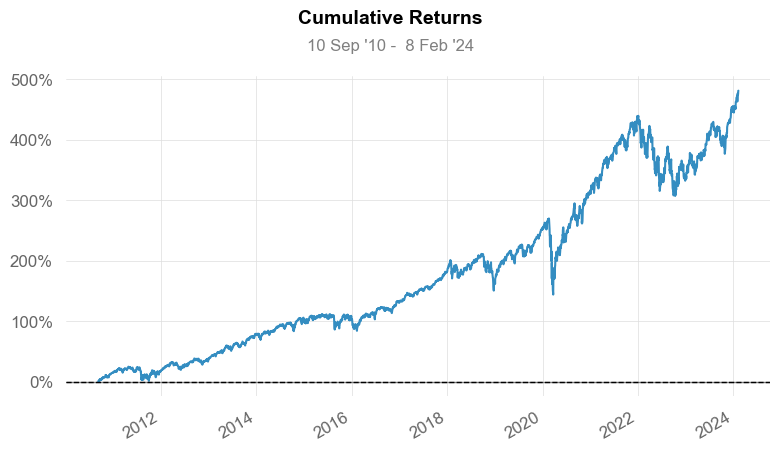

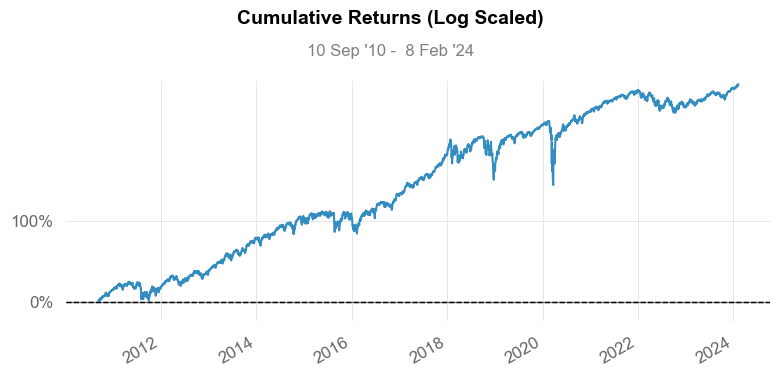

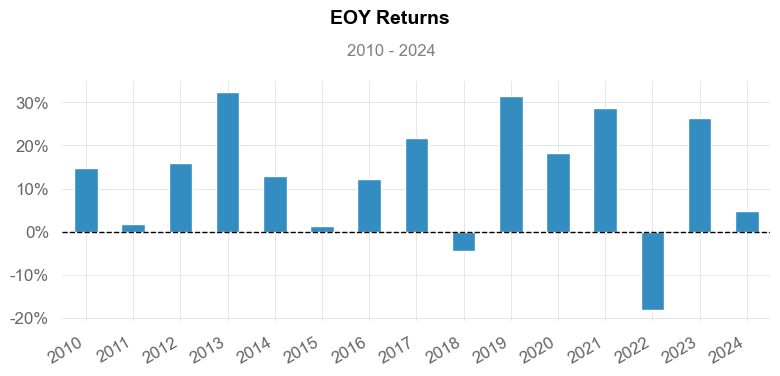

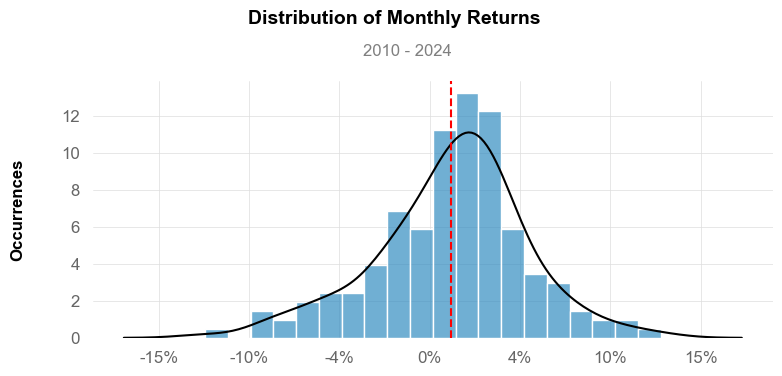

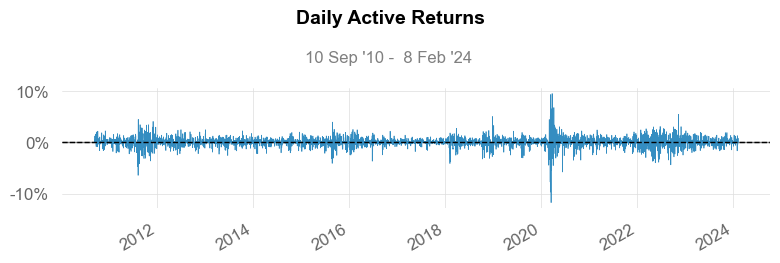

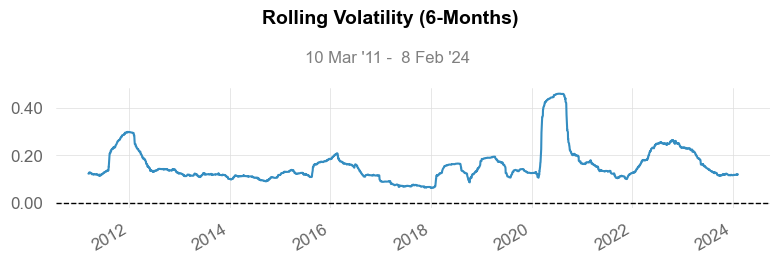

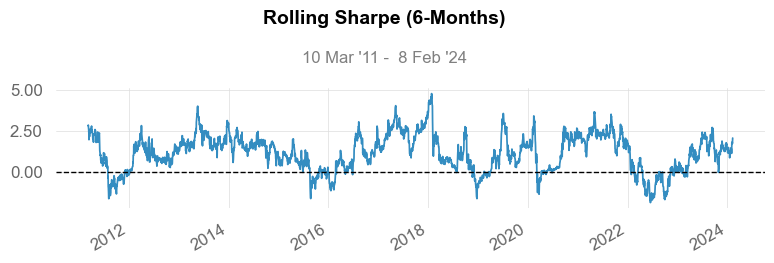

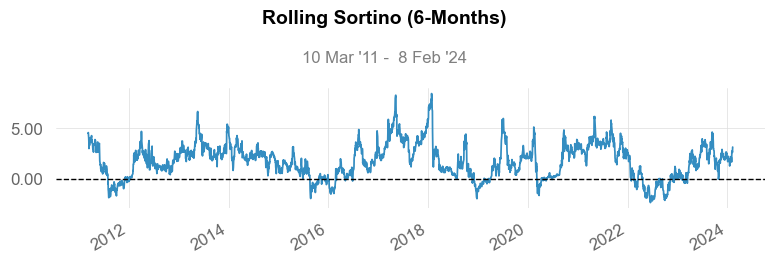

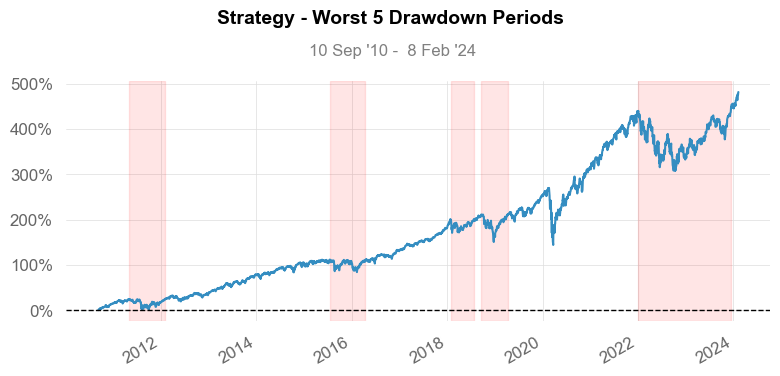

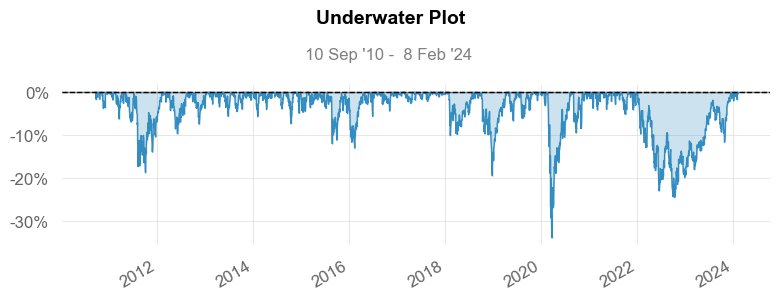

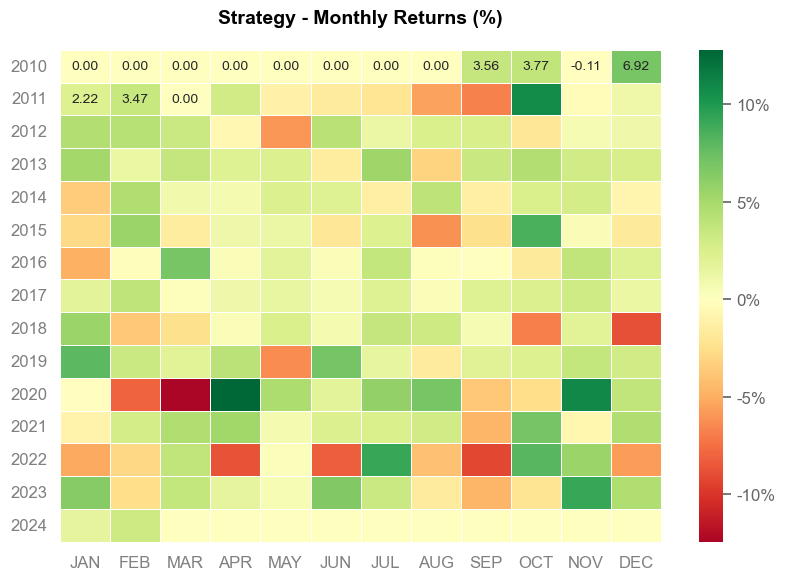

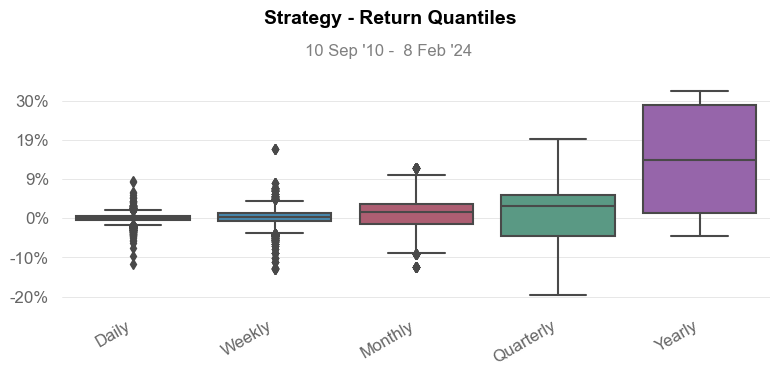

In [13]:
qs.reports.full(iasset)

In [14]:
# Comparing a stock to a benchmark.
# benchmark = s&p500
stock = qs.utils.download_returns('schd')
qs.reports.html(stock, "SPY", title = 'schd vs SPY' )

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
